<a href="https://colab.research.google.com/github/STW5/Machine-Learning/blob/main/%5B%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%5D_20191513_%EC%84%9C%ED%83%9C%EC%9B%85_%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C_%EB%8C%80%EC%B2%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#기계학습 기말고사

## 선형회귀 모델 구축

In [ ]:
!pip install scikit-learn==1.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import load_boston

import numpy as np
import pandas as pd

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

1. 데이터 불러오기

In [ ]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [ ]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston.data.shape

(506, 13)

2. 데이터 전처리하기

In [ ]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


2.1 train set과 test set 나누기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

3. 선형회귀 모델 구축하기

3.1 선형회귀 모델 가정 확인하기

In [ ]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)


3.1.1 확률오차의 정규성 확인

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


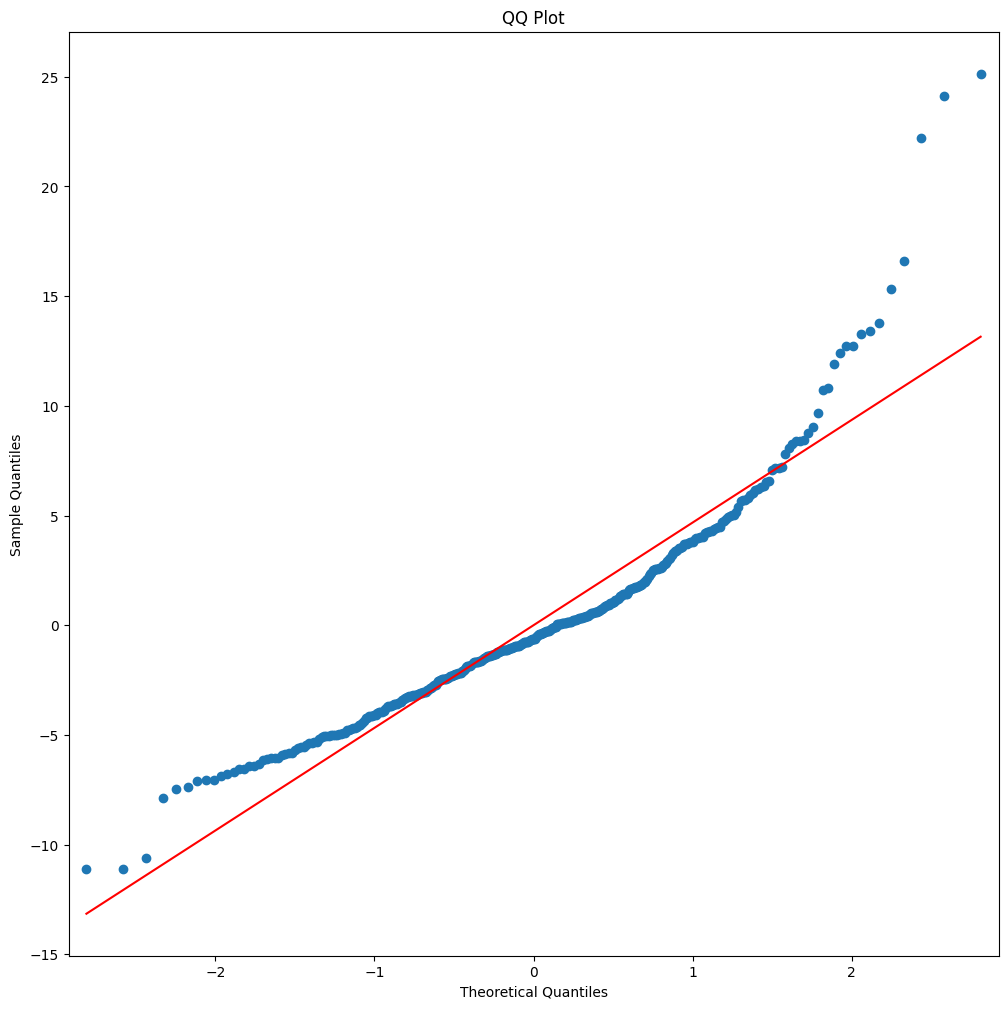

In [27]:
model_residuals = model_trained.resid

fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='red', ax=ax)
ax.title.set_text('QQ Plot')

In [ ]:
model_residuals

28     -1.369709
498    -0.059797
284     0.765858
414    11.983011
123     1.801067
         ...    
109    -0.579809
128    -1.021033
57     -1.897026
341     2.448366
116    -2.177192
Length: 404, dtype: float64

3.2 설명: 통계적으로 해석하기

In [ ]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     93.01
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          1.02e-110
Time:                        01:27:53   Log-Likelihood:                -1196.3
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0744      5.844      6.002      0.0

In [ ]:
model = sm.OLS(y_train, X_train.drop(['INDUS', 'AGE'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     110.3
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          1.19e-112
Time:                        01:27:53   Log-Likelihood:                -1196.5
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     392   BIC:                             2465.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6295      5.783      5.988      0.0

3.3 예측: 미래의 반응변수 값 예측하기

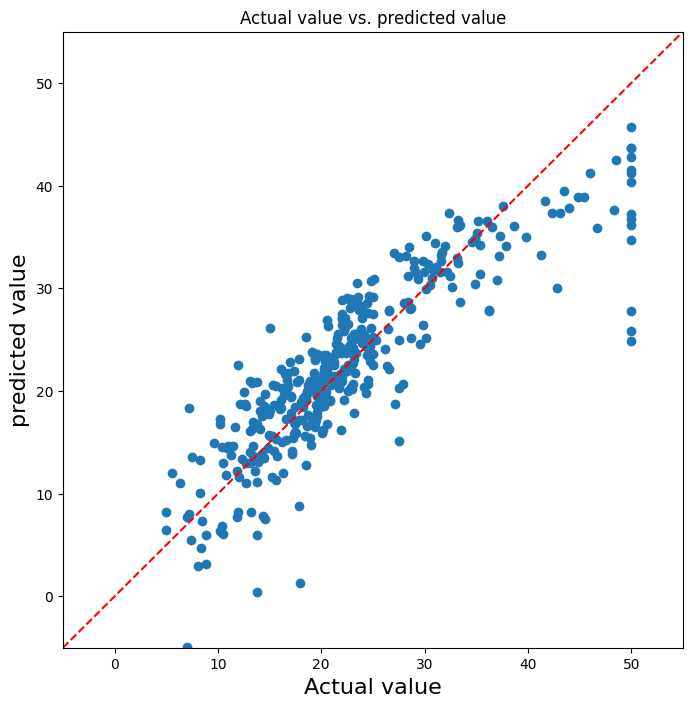

In [ ]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8, 8))
plt.title('Actual value vs. predicted value')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 55], [-5, 55], ls="--", c='red')
plt.xlabel('Actual value', size=16)
plt.ylabel('predicted value', size=16)
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.show()

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_test_pred = model_trained.predict(X_test.drop(['INDUS', 'AGE'], axis=1))
y_test_pred.head()

210    22.787949
24     15.482380
36     22.346630
439    13.433993
161    36.890921
dtype: float64

3.3.1 Mean Squared Error (평균 제곱 오차)

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

23.063158240353822


3.3.2 Root Mean Squared Error (제곱근 평균 제곱 오차)

In [ ]:
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

4.8024117108338205


4.3.3 Mean Absolute Error (평균 절대 오차)

In [ ]:
print(mean_absolute_error(y_test, y_test_pred))

3.5123023508951166


3.3.4 Mean Absolute Percentage Error (평균 절대 백분율 오차)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
print(mean_absolute_error(y_test, pd.DataFrame(y_test_pred)))

3.5123023508951166


3.3.5 R squared (결정계수)

In [ ]:
print(r2_score(y_test, y_test_pred))

0.6389403215499566


3.3.6 최종 결과정리

In [ ]:
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))

Training MSE: 21.881
Training RMSE: 4.678
Training MAE: 3.315
Training MAPE: 51.174
Training R2: 0.756


In [ ]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE: 23.063
Testing RMSE: 4.802
Testing MAE: 3.512
Testing MAPE: 43.946
Testing R2: 0.639
